# Two Sensor Experiments

## Import Statements

In [1]:
# Library imports.
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.signal import correlate

# UrbanSurge imports.
from urbansurge.swmm_model import SWMM
from urbansurge.data_acquisition import align_measurements, voltage_to_value
from urbansurge.data_acquisition import discrete_flow_series, flow_rate, flow_to_swmm_readable, mean_reading
from urbansurge.fault_diagnosis.moment_detection import moment_fault_detect

## Sensor Parameters

In [ ]:
sensor_parameters = {
    'Sergei': {
        'calibration': {
            'b0': -0.0358,
            'b1': 0.801
        },
        'location': 'pipe',
    },
    'Louise': {
        'calibration': {
            'b0': 0.3208,
            'b1': 0.7624
        },
        'location': 'pipe',
    },
    'Ludwig': {
        'calibration': {
            'b0': -0.1124,
            'b1': 0.7839
        },
        'location': 'pipe',
    },
    'Tank': {
        'calibration': {
            'b0': 4.3401,
            'b1': 2.3017
        },
        'location': 'tank',
    },
}

## Load in experiment

#### Load in data files

In [ ]:
database_filepath = 'data_organization_worksheet.csv'
database = pd.read_csv(database_filepath)

experiment_dir = Path(r"sensor_data")

database_baseline = database[database['fault_level'] == 0]
baseline_dfs = [pd.read_csv(experiment_dir / f) for f in database_baseline['filename']]

database_20 = database[database['fault_level'] == 1]
test_files_20 = [pd.read_csv(experiment_dir / f) for f in database_20['filename']]

database_40 = database[database['fault_level'] == 2]
test_files_40 = [pd.read_csv(experiment_dir / f) for f in database_40['filename']]

#### Plot sensor readings

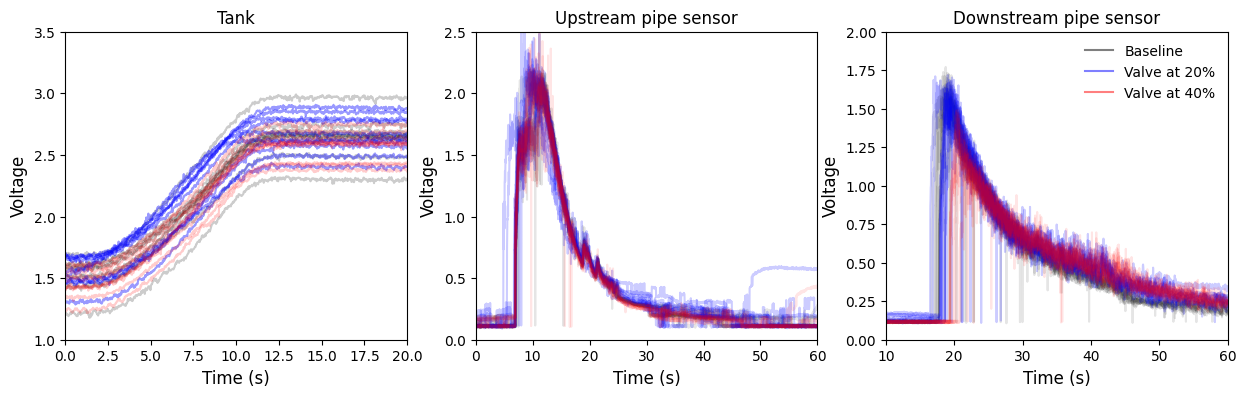

In [34]:
# Unaligned impulse and depth measurements.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))

# Impulse.
for df in baseline_dfs:
    ax1.plot(df['time'], df['V_ai2'], 'k', alpha=0.2)

for df in test_files_20:
    ax1.plot(df['time'], df['V_ai2'], 'b', alpha=0.4)

for df in test_files_40:
    ax1.plot(df['time'], df['V_ai2'], 'r', alpha=0.2)

ax1.set_xlim(0, 20)
ax1.set_ylim(1, 3.5)
ax1.set_title('Tank')
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Voltage', fontsize=12)

# Depth in pipe at ai0
for df in baseline_dfs:
    ax2.plot(df['time'], df['V_ai0'], 'k', alpha=0.1)

for df in test_files_20:
    ax2.plot(df['time'], df['V_ai0'], 'b', alpha=0.2)

for df in test_files_40:
    ax2.plot(df['time'], df['V_ai0'], 'r', alpha=0.1)

ax2.set_xlim(0, 60)
ax2.set_ylim(0, 2.5)
ax2.set_title('Upstream pipe sensor')
ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel('Voltage', fontsize=12)

# Depth in pipe at ai1.
for df in baseline_dfs:
    ax3.plot(df['time'], df['V_ai1'], 'k', alpha=0.1)

for df in test_files_20:
    ax3.plot(df['time'], df['V_ai1'], 'b', alpha=0.2)

for df in test_files_40:
    ax3.plot(df['time'], df['V_ai1'], 'r', alpha=0.1)

ax3.set_xlim(10, 60)
ax3.set_ylim(0, 2)
ax3.set_title('Downstream pipe sensor')
ax3.set_xlabel('Time (s)', fontsize=12)
ax3.set_ylabel('Voltage', fontsize=12)

# Legend plots.
ax3.plot([], [], 'k', alpha=0.5, label='Baseline')
ax3.plot([], [], 'b', alpha=0.5, label='Valve at 20%')
ax3.plot([], [], 'r', alpha=0.5, label='Valve at 40%')
ax3.legend(fontsize=10, frameon=False)

(0.0, 3.0)

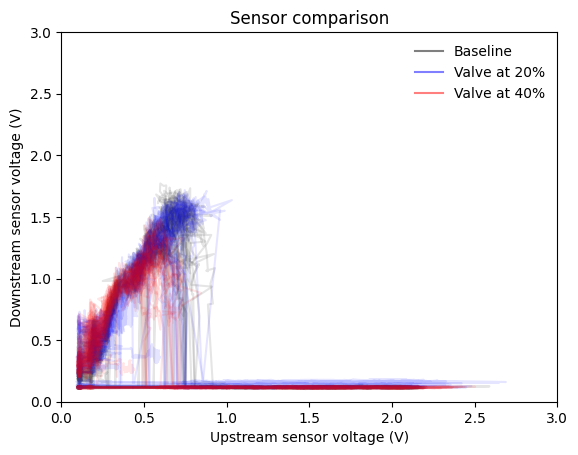

In [33]:
fig, ax = plt.subplots(1,1)

for df in baseline_dfs:
    ax.plot(df['V_ai0'], df['V_ai1'], 'k', alpha=0.1)

for df in test_files_20:
    ax.plot(df['V_ai0'], df['V_ai1'], 'b', alpha=0.1)

for df in test_files_40:
    ax.plot(df['V_ai0'], df['V_ai1'], 'r', alpha=0.1)

ax.set_xlabel('Upstream sensor voltage (V)')
ax.set_ylabel('Downstream sensor voltage (V)')
ax.set_title('Sensor comparison')

ax.plot([], [], 'k', alpha=0.5, label='Baseline')
ax.plot([], [], 'b', alpha=0.5, label='Valve at 20%')
ax.plot([], [], 'r', alpha=0.5, label='Valve at 40%')
ax.legend(fontsize=10, frameon=False)

ax.set_xlim(0,3)
ax.set_ylim(0,3)